In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

# **Importing the Libraries**

In [262]:
df = pd.read_csv('../input/air-qualityuci/AirQualityUCI.csv')
df.shape
df.head(5)
df.describe()
df.columns
df.dtypes
df.isnull()
df.isna().sum()  # to check if the dataset contains any missing values

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      5
NMHC(GT)         2
C6H6(GT)         2
PT08.S2(NMHC)    2
NOx(GT)          5
PT08.S3(NOx)     1
NO2(GT)          2
PT08.S4(NO2)     2
PT08.S5(O3)      1
T                2
RH               0
AH               2
dtype: int64

# **Data Loading and Basic Exploration**

In [263]:
df.fillna(-200, inplace=True)  # replace missing values with -200 

# Select only numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Filter rows where all numeric columns have values >= 0
df = df[(df[numeric_columns] >= 0).all(axis=1)]

print(df)

            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
3     03-10-2004  21:00:00     2.2       1376.0      80.0       9.2   
6     03-11-2004  00:00:00     1.2       1185.0      31.0       3.6   
7     03-11-2004  01:00:00     1.0       1136.0      31.0       3.3   
8     03-11-2004  02:00:00     0.9       1094.0      24.0       2.3   
13    03-11-2004  07:00:00     1.1       1144.0      29.0       3.2   
...          ...       ...     ...          ...       ...       ...   
1226   4/30/2004  20:00:00     4.4       1449.0     501.0      19.5   
1227   4/30/2004  21:00:00     3.1       1363.0     234.0      15.1   
1228   4/30/2004  22:00:00     3.0       1371.0     212.0      14.6   
1229   4/30/2004  23:00:00     3.1       1406.0     275.0      13.7   
1230  05-01-2004  00:00:00     3.5       1425.0     275.0      15.2   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
3             948.0    172.0        1092.0      0.0        1584.0   
6        

# **Handling Missing Values**

In [264]:
# Combine 'Date' and 'Time' and convert to datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], 
                                 dayfirst=True, 
                                 errors='coerce', 
                                 format='mixed')

# Handle parsing errors
print("Rows with parsing errors:")
print(df[df['datetime'].isna()])

# Drop rows with invalid datetime
df.dropna(subset=['datetime'], inplace=True)

# Set 'datetime' as index
df.set_index('datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

print("Cleaned DataFrame:")
print(df)


Rows with parsing errors:
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, datetime]
Index: []
Cleaned DataFrame:
                     CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
datetime                                                                      
2004-10-03 21:00:00     2.2       1376.0      80.0       9.2          948.0   
2004-11-03 00:00:00     1.2       1185.0      31.0       3.6          690.0   
2004-11-03 01:00:00     1.0       1136.0      31.0       3.3          672.0   
2004-11-03 02:00:00     0.9       1094.0      24.0       2.3            0.0   
2004-11-03 07:00:00     1.1       1144.0      29.0       3.2          667.0   
...                     ...          ...       ...       ...            ...   
2004-04-30 20:00:00     4.4       1449.0     501.0      19.5         1282.0   
2004-04-30 21:00:00     3.1       1363.0     234.0      15.1

# **Date and Time Processing**

In [265]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]


# **Normalization**

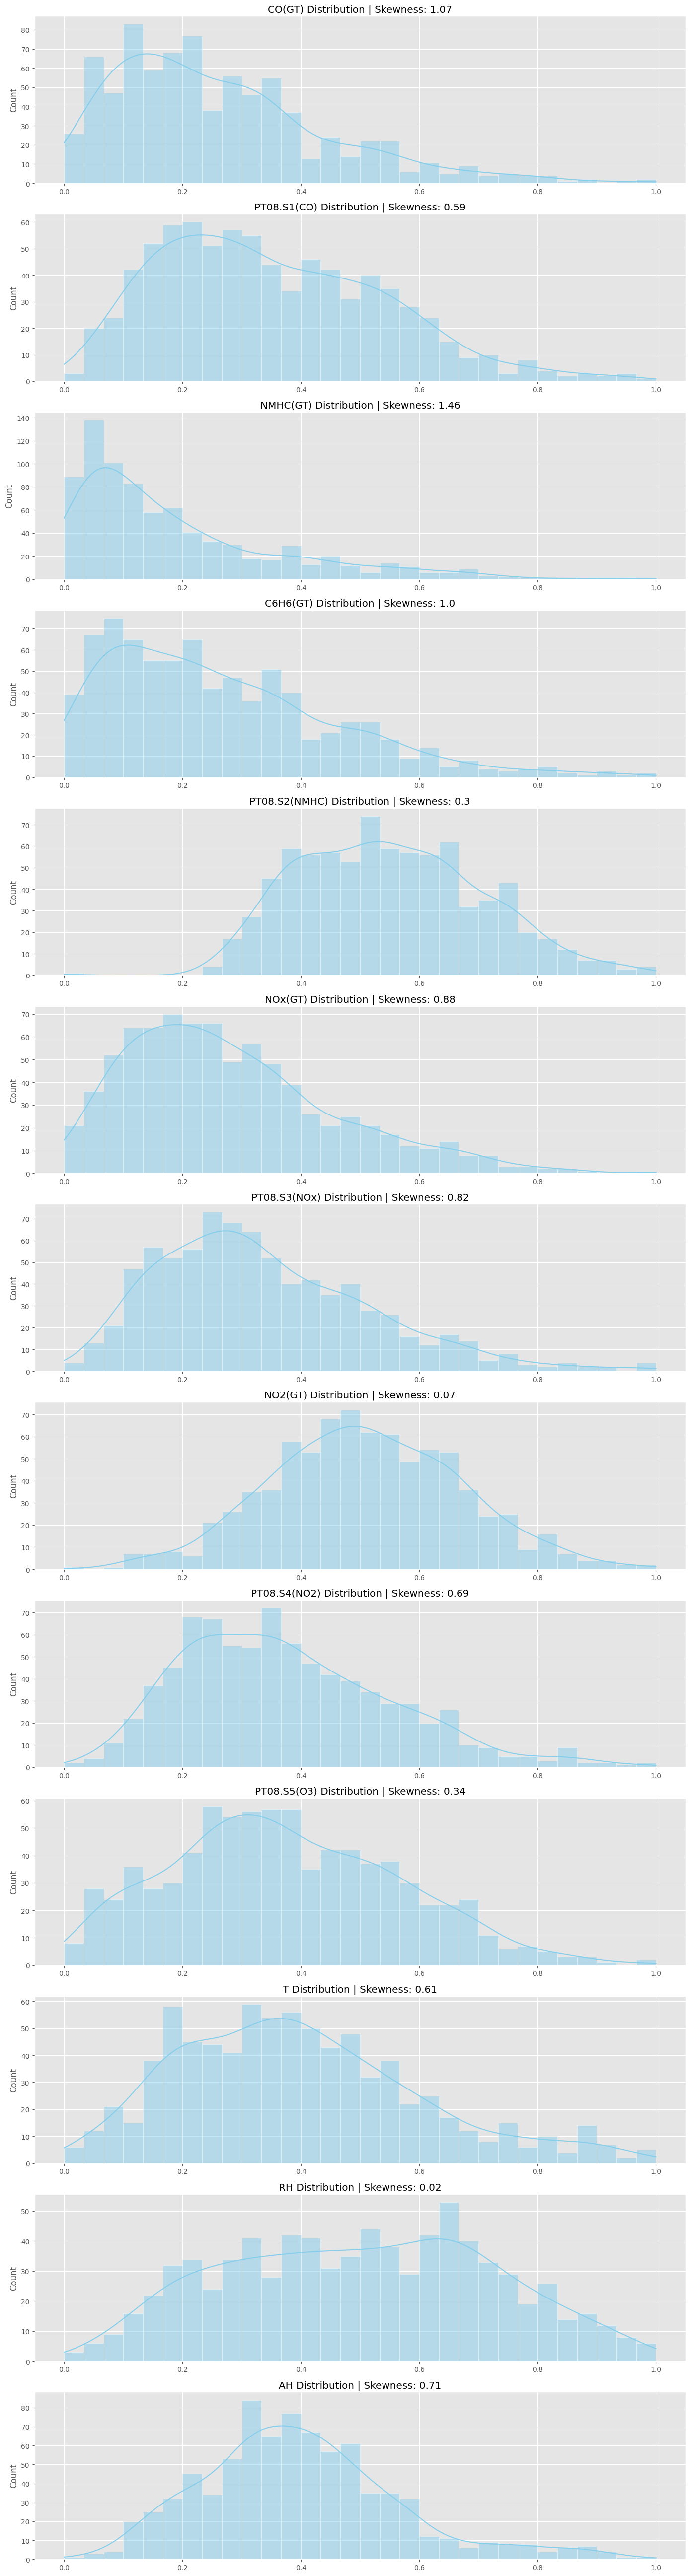

In [266]:
plt.figure(figsize=(14, len(numeric_columns) * 4))
for idx, feature in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
    plt.title(f"{feature} Distribution | Skewness: {round(df[feature].skew(), 2)}")
    plt.xlabel("")
plt.tight_layout()
plt.show()


# **Data Visualization (Histograms)**

Text(0, 0.5, 'Count')

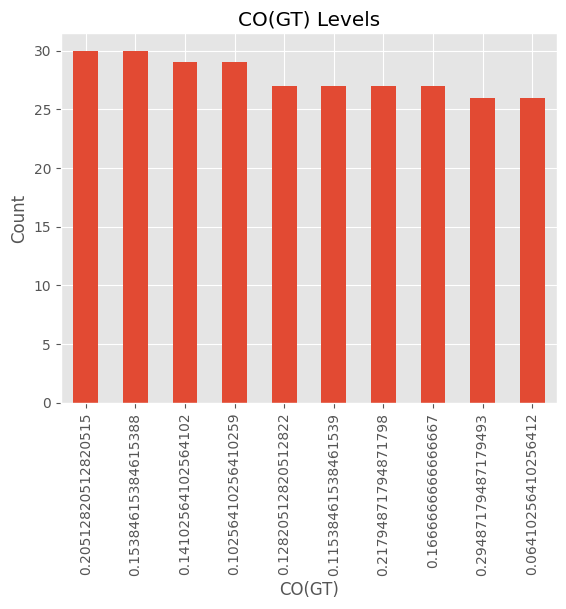

In [267]:
ax = df['CO(GT)'].value_counts().head(10).plot(kind='bar', title='CO(GT) Levels')
ax.set_xlabel('CO(GT)')
ax.set_ylabel('Count')


# **CO(GT) Bar Plot**

datetime
2004-10-03 21:00:00    0.000000
2004-11-03 00:00:00    0.392857
2004-11-03 01:00:00    0.387755
2004-11-03 02:00:00    0.306122
2004-11-03 07:00:00    0.418367
                         ...   
2004-04-30 20:00:00    0.678571
2004-04-30 21:00:00    0.561224
2004-04-30 22:00:00    0.520408
2004-04-30 23:00:00    0.551020
2004-01-05 00:00:00    0.561224
Name: NO2(GT), Length: 807, dtype: float64

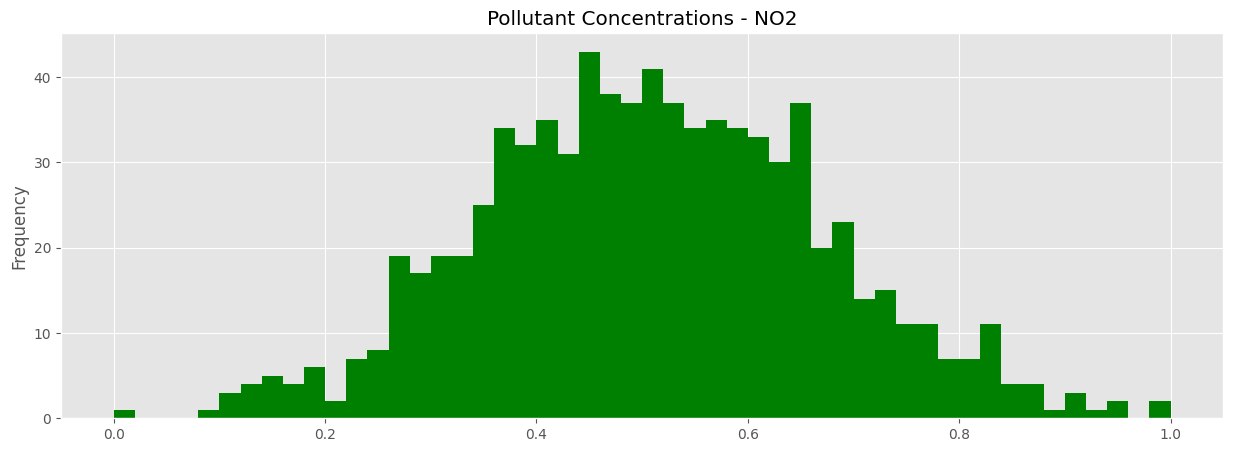

In [268]:
df = df[df['NO2(GT)'] >= 0]
df['NO2(GT)'].plot(kind='hist', bins=50, color='green',
                     title='Pollutant Concentrations - NO2',
                     figsize=(15, 5))

df['NO2(GT)']


# **Pollutant Concentrations Histogram (NO2)**

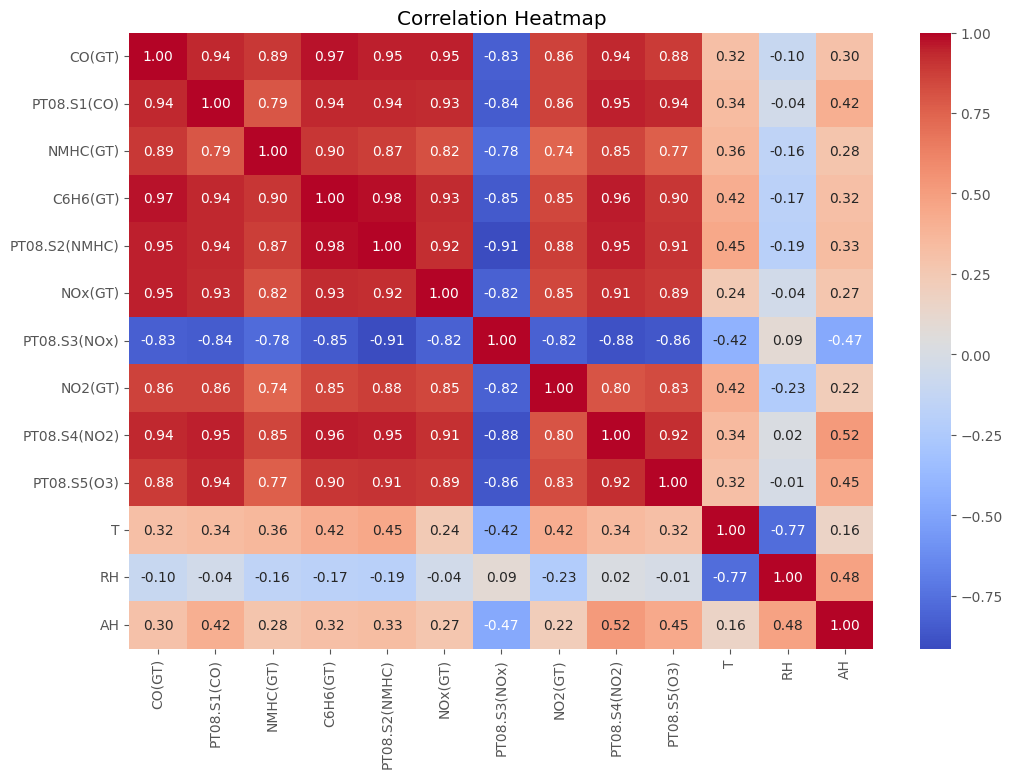

In [269]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Correlation Heatmap**

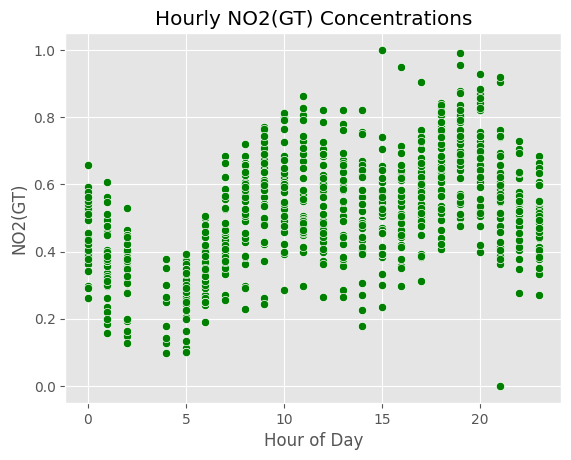

In [270]:
df['hour'] = df.index.hour  # Extract hour from datetime
sns.scatterplot(x='hour', y='NO2(GT)', data=df, color='green')
plt.title('Hourly NO2(GT) Concentrations')
plt.xlabel('Hour of Day')
plt.ylabel('NO2(GT)')
plt.show()


# **Hourly NO2(GT) Scatterplot**

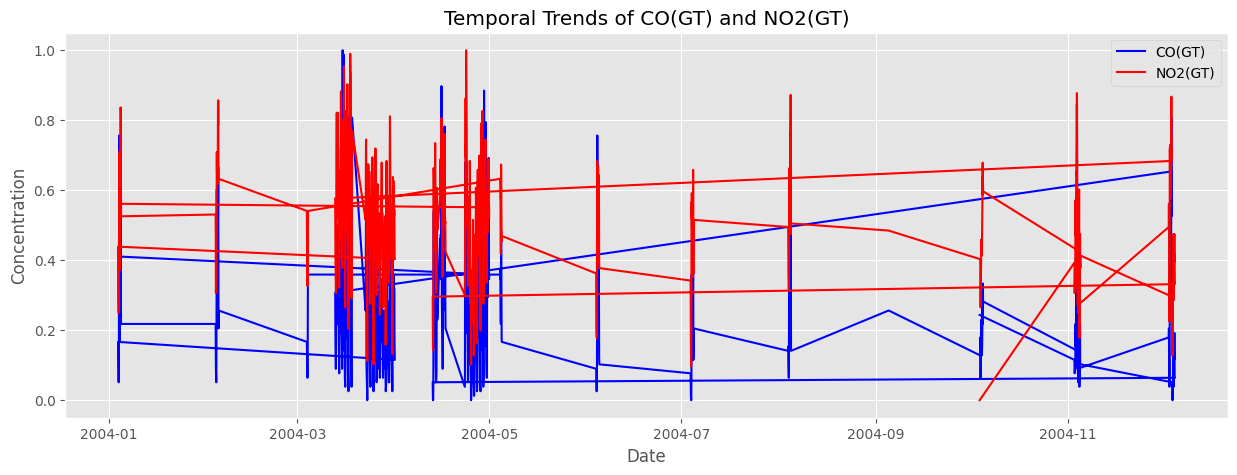

In [271]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='blue')
plt.plot(df.index, df['NO2(GT)'], label='NO2(GT)', color='red')
plt.title('Temporal Trends of CO(GT) and NO2(GT)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


# **Temporal Trends (CO and NO2)**

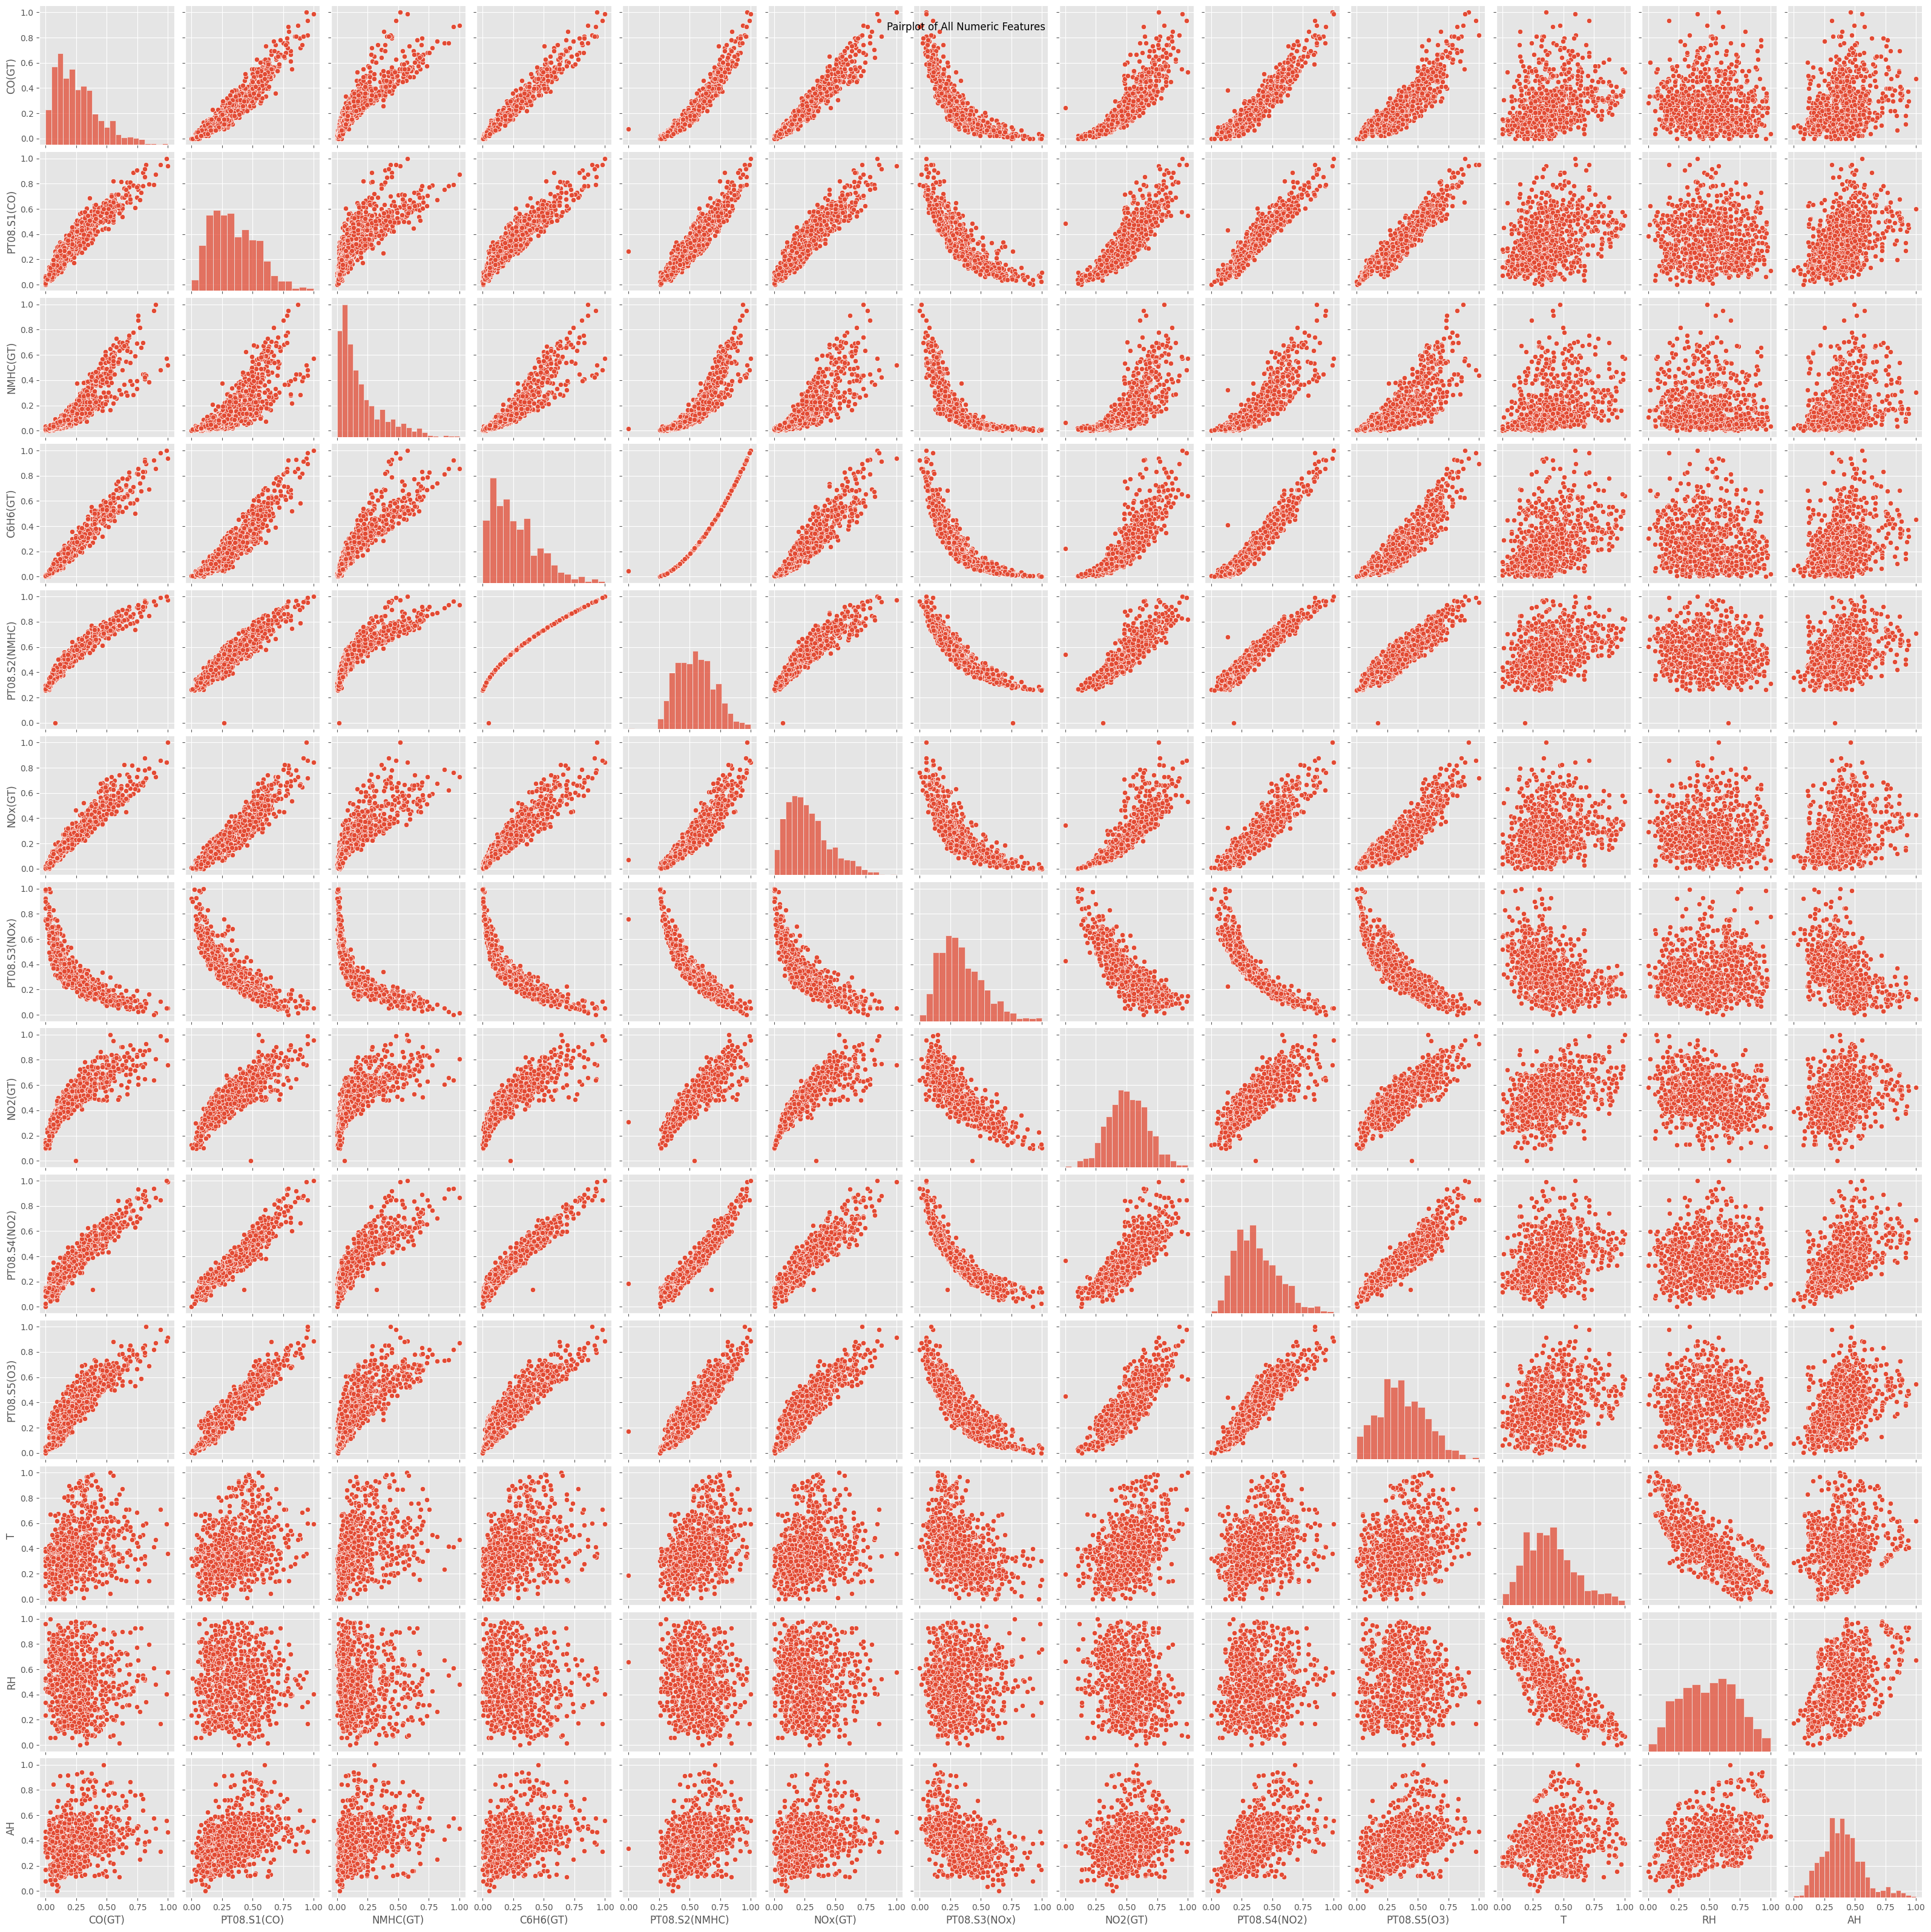

In [272]:
sns.pairplot(df[numeric_columns])
plt.suptitle('Pairplot of All Numeric Features')
plt.show()

# **Pairplot of All Numeric Features**

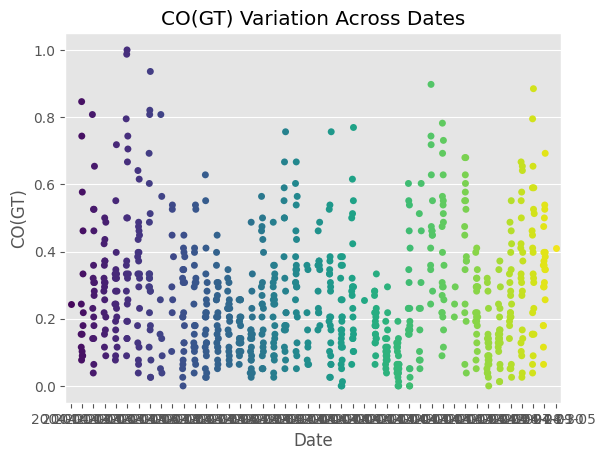

In [273]:
sns.stripplot(y="CO(GT)", x=df.index.date, data=df, palette='viridis', size=5)
plt.title('CO(GT) Variation Across Dates')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.show()

# **Stripplot for CO(GT) Variation Across Dates**

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

target_column = 'CO(GT)'  # Define your target variable
X = numeric_df.drop(columns=[target_column])  # Features
y = numeric_df[target_column]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")


Mean Squared Error: 0.0009400232140972893
R-squared: 0.9654622156523084


# **Model Training and Evaluation**

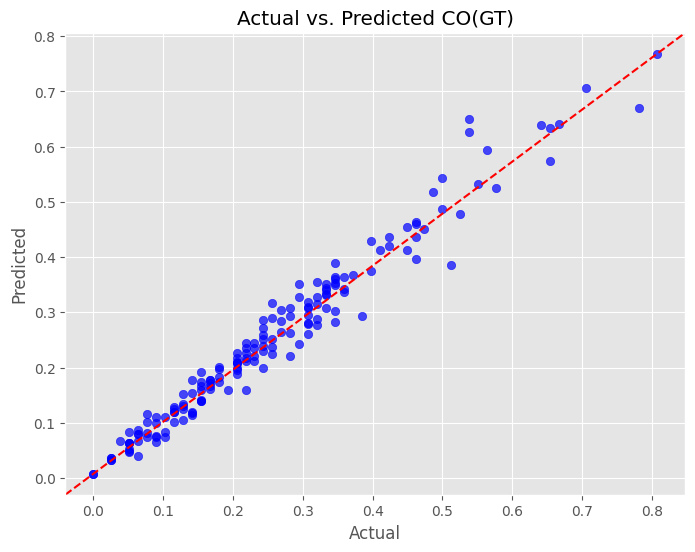

In [275]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, linestyle='--', color='red')
plt.title('Actual vs. Predicted CO(GT)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# **Actual vs. Predicted CO(GT)**

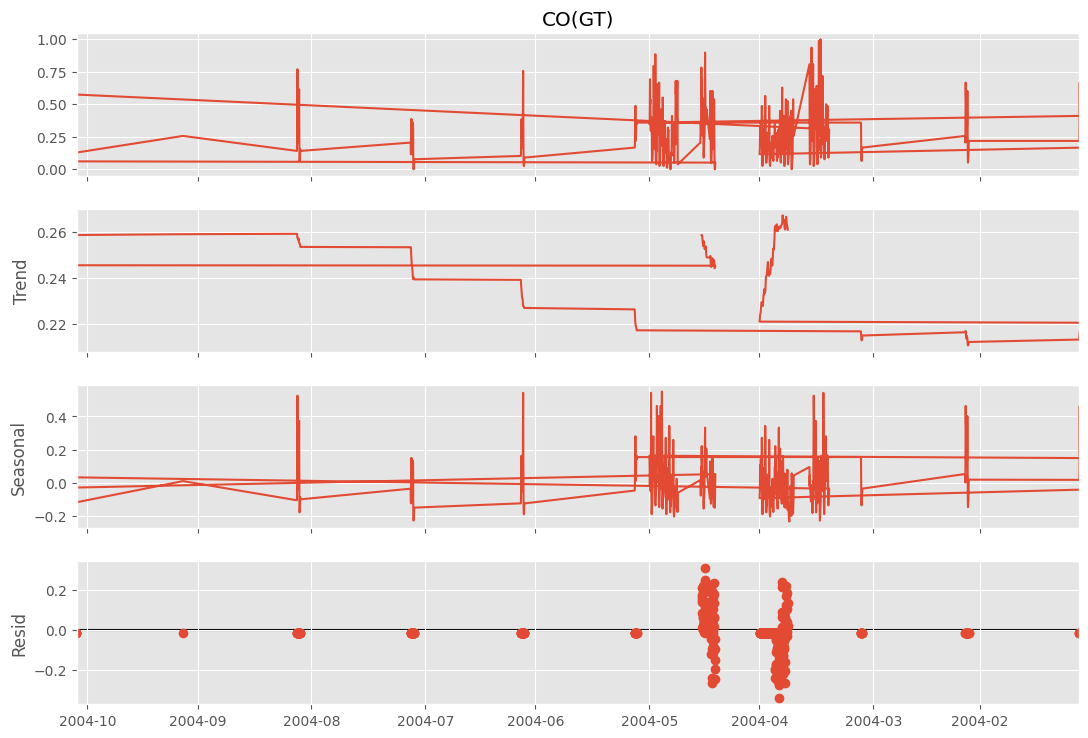

In [276]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose CO(GT) time series
decomposition = seasonal_decompose(df['CO(GT)'], model='additive', period=365)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


# **Seasonal Decomposition**

In [277]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on CO(GT)
result = adfuller(df['CO(GT)'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -2.2730052272978805
p-value: 0.18082216261105805


# **ADF Test for Stationarity**

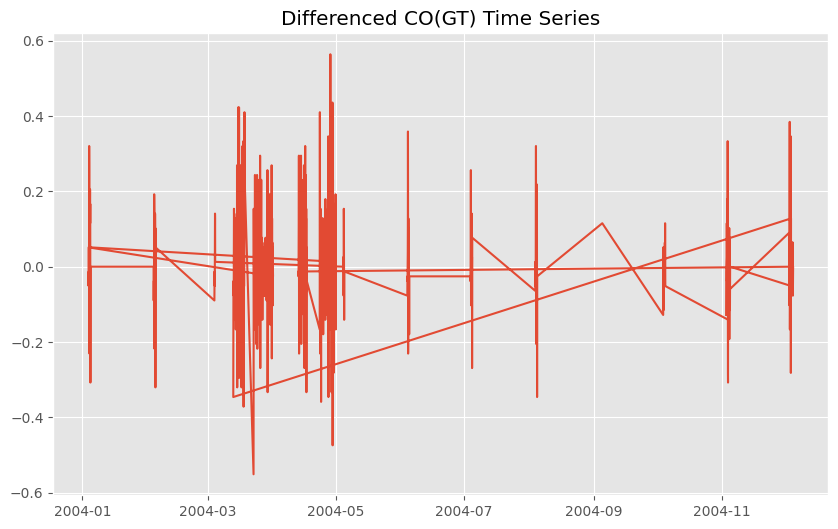

In [278]:
# Difference the data (first order differencing)
df['CO(GT)_diff'] = df['CO(GT)'] - df['CO(GT)'].shift(1)

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df['CO(GT)_diff'])
plt.title('Differenced CO(GT) Time Series')
plt.show()


# **Differencing the Data**

In [279]:
result_diff = adfuller(df['CO(GT)_diff'].dropna())
print(f'ADF Statistic (Differenced): {result_diff[0]}')
print(f'p-value (Differenced): {result_diff[1]}')

ADF Statistic (Differenced): -14.176466261116344
p-value (Differenced): 1.962183436249171e-26


# **Recheck ADF After Differencing**

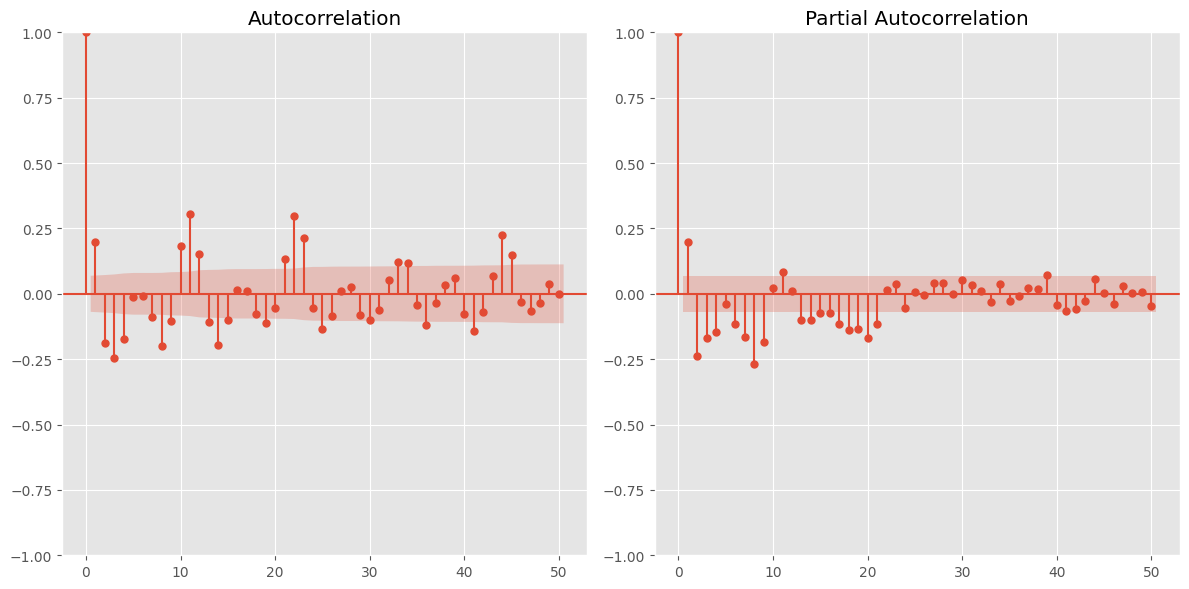

In [280]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for differenced data (if required)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['CO(GT)_diff'].dropna(), lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['CO(GT)_diff'].dropna(), lags=50, ax=plt.gca())
plt.tight_layout()
plt.show()


# **ACF and PACF Plots**

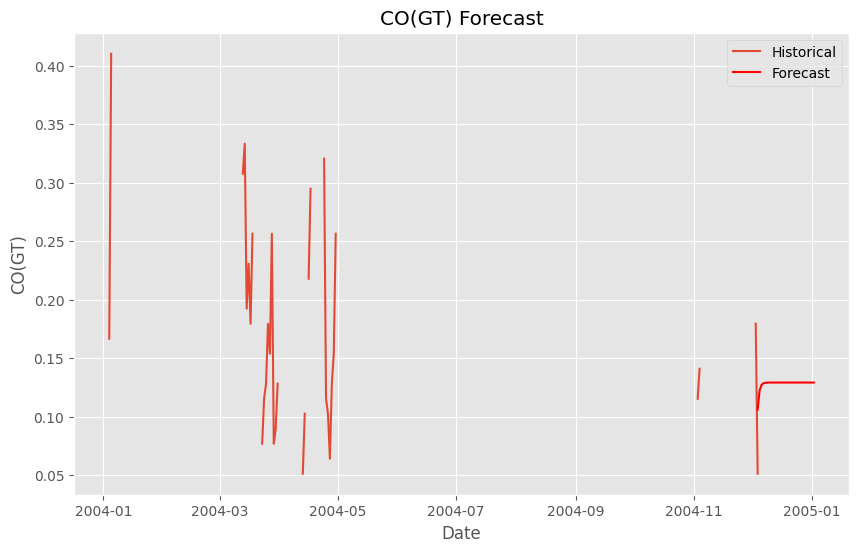

In [281]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Set frequency (adjust to your data's frequency)
df = df.asfreq('D')  # Change 'D' to your desired frequency, e.g., 'M' for monthly

# Sort index to ensure it is monotonic
df = df.sort_index()

# Fit ARIMA model with p, d, q (example values; adjust according to ACF/PACF)
p, d, q = 1, 1, 1  # Example values for ARIMA model
model = ARIMA(df['CO(GT)'], order=(p, d, q))
model_fit = model.fit()

# Make forecast
forecast = model_fit.forecast(steps=30)  # Forecast next 30 steps
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CO(GT)'], label='Historical')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), forecast, color='red', label='Forecast')
plt.title('CO(GT) Forecast')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()


# **ARIMA Model**

In [282]:
# Seasonal decomposition of CO(GT)
#decomposition = seasonal_decompose(df['CO(GT)'], model='additive', period=365)
#decomposition.plot()
#plt.show()


In [283]:
import joblib

# Save the fitted ARIMA model
joblib.dump(model_fit, 'arima_model.pkl')


['arima_model.pkl']

# **Save ARIMA Model**